In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

## Check out the 5 datasets

In [3]:
path = '../kaggle_data/input/'

In [4]:
train = pd.read_csv(path+'train.csv')
weather = pd.read_csv(path+'weather.csv')
spray = pd.read_csv(path+'spray.csv')
test = pd.read_csv(path+'test.csv')
sample_sub = pd.read_csv(path+'sampleSubmission.csv')

In [5]:
sample_sub.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [8]:
print(test.shape)
print(test.Date.nunique())
print(test.Date.min())
print(test.Date.max())
test.head(2)

(116293, 11)
95
2008-06-11
2014-10-02


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [9]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


## Trap Readings in `train.csv`

In [10]:
# How large is our training dataset?
print(train.shape) # It has over 10,000 observations
train.columns # and 12 columns.

(10506, 12)


Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [11]:
# We want to create a unique identifer for traps
print(train['Trap'].head(3)) # Each trap has an identifier that starts with T
print(train['Trap'].nunique()) # There are 136 unique traps. that's about 100 rows per trap!

0    T002
1    T002
2    T007
Name: Trap, dtype: object
136


In [12]:
# Each trap has readings on multiple days. For example, the first one has 185 rows, with 67 unique dates:
print(train[train['Trap']=='T002'].Date.nunique())
print(train[train['Trap']=='T002'].Date.count())
train[train['Trap']=='T002'].Date.head()

67
185


0     2007-05-29
1     2007-05-29
25    2007-06-05
26    2007-06-05
27    2007-06-05
Name: Date, dtype: object

In [13]:
# In addition to Date, what makes a row unique?
# Species and count over 50.
print(train[train['Trap']=='T002'].Date.value_counts().head())
train[(train['Trap']=='T002') & (train['Date']=='2013-07-12')].head(3)

2013-07-12    12
2013-06-14     8
2009-07-24     7
2013-08-08     6
2013-07-08     6
Name: Date, dtype: int64


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
8669,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0
8670,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0
8671,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0


In [14]:
# How many times does each species show up?
print(train['Species'].value_counts()) # Species are not equally represented
train.groupby('Species').mean() # WNV is only ever present in 3 of the 7 species.

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Species,,,,,,
CULEX ERRATICUS,10.000000,41.974689,-87.890615,9.000000,7.000000,0.000000
CULEX PIPIENS,32.799926,41.813402,-87.680481,7.424972,16.550945,0.088922
CULEX PIPIENS/RESTUANS,36.706439,41.848832,-87.705241,7.939604,13.945286,0.055135
CULEX RESTUANS,36.784307,41.859096,-87.713366,8.019708,8.551460,0.017883
CULEX SALINARIUS,32.627907,41.825134,-87.693788,7.767442,1.686047,0.000000
CULEX TARSALIS,30.500000,41.818023,-87.661568,7.500000,1.166667,0.000000
CULEX TERRITANS,36.900901,41.798297,-87.658375,7.599099,2.297297,0.000000


## Reduce the dataset using a `groupby` statement

In [15]:
# We can reduce the dataset to a single row for each trap reading by species and date.
print(train['Date'].nunique()) # There are 95 unique dates
print((train['Trap']).nunique()) # There are 136 unique traps
len(train.groupby(['Date', 'Trap', 'Species'])) # There are 8,500 unique readings by date & trap

95
136


8475

In [16]:
# Individual daily trap readings are combination of date, trap, and species:
train.groupby(['Date', 'Trap', 'Species']).sum().sort_values(['WnvPresent'], ascending=False).head()

Block     Latitude    Longitude  \
Date       Trap Species                                                   
2007-08-16 T115 CULEX PIPIENS             612  2125.343808 -4467.592962   
2013-08-01 T900 CULEX PIPIENS/RESTUANS    250  1049.367225 -2197.265375   
2013-08-29 T900 CULEX PIPIENS             100   419.746890  -878.906150   
2007-08-22 T115 CULEX PIPIENS             384  1333.549056 -2803.195584   
           T138 CULEX PIPIENS             220   917.982230 -1926.879086   

                                        AddressAccuracy  NumMosquitos  \
Date       Trap Species                                                 
2007-08-16 T115 CULEX PIPIENS                       255          2532   
2013-08-01 T900 CULEX PIPIENS/RESTUANS              225           984   
2013-08-29 T900 CULEX PIPIENS                        90           281   
2007-08-22 T115 CULEX PIPIENS                       160          1554   
           T138 CULEX PIPIENS                       110          1054   

                                        WnvPresent  
Date       Trap Species                             
2007-08-16 T115 CULEX PIPIENS                   10  
2013-08-01 T900 CULEX PIPIENS/RESTUANS           9  
2013-08-29 T900 CULEX PIPIENS                    8  
2007-08-22 T115 CULEX PIPIENS                    7  
           T138 CULEX PIPIENS                    6

In [17]:
# But we are not going to use that groupby because the test.csv isn't organized that way.
readings=train

## Organize the `date` variable

In [18]:
# Let's convert date/time into something usable. 
readings['Day']=readings['Date'].str.split('-').str[-1].astype(str)
readings['Month']=readings['Date'].str.split('-').str[1].astype(str)
readings['Year']=readings['Date'].str.split('-').str[0].astype(int)
readings['MonthDay']=readings['Month'].astype(str) + readings['Day'].astype(str)
readings[['Date', 'Year', 'Month','Day', 'MonthDay']].head()

,Date,Year,Month,Day,MonthDay
0,2007-05-29,2007,05,29,0529
1,2007-05-29,2007,05,29,0529
2,2007-05-29,2007,05,29,0529
3,2007-05-29,2007,05,29,0529
4,2007-05-29,2007,05,29,0529


In [19]:
# Let's create a running count of days within the year:
readings['DayRunner']=pd.to_datetime(readings['Date']).dt.dayofyear
print(readings['DayRunner'].describe())
readings[['DayRunner', 'MonthDay', 'Month', 'Day']].head()

count    10506.000000
mean       217.941938
std         31.735797
min        148.000000
25%        196.000000
50%        217.000000
75%        241.000000
max        282.000000
Name: DayRunner, dtype: float64


,DayRunner,MonthDay,Month,Day
0,149,0529,05,29
1,149,0529,05,29
2,149,0529,05,29
3,149,0529,05,29
4,149,0529,05,29


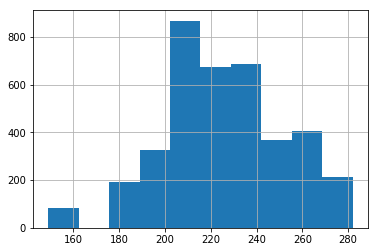

In [20]:
# Let's visualize that dayrunner variable for just one year (2007)
readings[readings['Year']==2007]['DayRunner'].hist();

In [21]:
# How many months are there? Six, ranging from May to October.
readings['Month']=readings['Month'].astype(int)
readings['Month'].value_counts().sort_index()

5       84
6     1571
7     2606
8     3751
9     2218
10     276
Name: Month, dtype: int64

In [22]:
# How many years are we talking about? Just 4 of them.
readings['Year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: Year, dtype: int64

## Outcome Variable

In [23]:
readings.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Day', 'Month', 'Year', 'MonthDay',
       'DayRunner'],
      dtype='object')

In [24]:
# Let's make sure the outcome variables is 0/1.
readings['Virus']=0
readings.loc[readings['WnvPresent']>0, 'Virus']=1
readings['Virus'].value_counts()

0    9955
1     551
Name: Virus, dtype: int64

In [25]:
# Is it about the same across the four years?
x=readings['Virus'].groupby(readings['Year']).value_counts()
print(x)

Year  Virus
2007  0        3575
      1         236
2009  0        2230
      1          19
2011  0        1997
      1          57
2013  0        2153
      1         239
Name: Virus, dtype: int64


## Block Location

In [26]:
# Are there multiple traps on the same block?
print('Number of Traps:', readings[readings['Year']==2013]['Trap'].nunique())
print('Number of Blocks:',readings[readings['Year']==2013]['Block'].nunique())
print('Max Traps per Block:', readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().max())
print('Min Traps per Block:', readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().min())

Number of Traps: 74
Number of Blocks: 44
Max Traps per Block: 7
Min Traps per Block: 1


In [27]:
# Do some blocks have more virus than others?
print(readings['Virus'].mean())
print(readings['Block'].mean())
readings['Virus'].groupby(readings['Block']).mean().sort_values(ascending=False).head(20)

0.05244622120692937
35.68779744907672


Block
46    0.114754
72    0.106061
82    0.100000
41    0.097297
65    0.085470
51    0.083333
36    0.082707
91    0.081081
58    0.079365
64    0.079365
63    0.069767
40    0.068783
24    0.068750
12    0.067769
10    0.064460
61    0.061404
21    0.061224
71    0.060150
22    0.058000
52    0.057762
Name: Virus, dtype: float64

In [28]:
# 13 Blocks have 3 or more traps
readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().sort_values(ascending=False).head(15)

Block
10    7
11    4
17    4
58    3
22    3
39    2
42    2
35    2
50    2
51    2
52    2
61    2
25    2
70    2
71    2
Name: Trap, dtype: int64

## Bar Charts by Year and Month

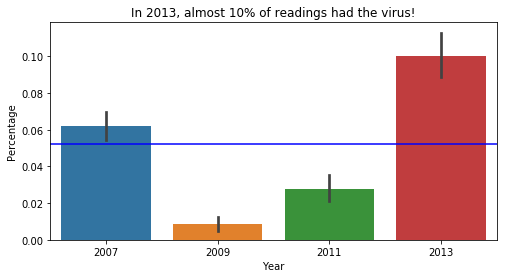

In [29]:
# Let's take a look at virus by year.
ax = plt.figure(figsize=(8,4))
ax=sns.barplot(x='Year', y='Virus', data=readings)
ax.set(ylabel='Percentage', xlabel='Year', title='In 2013, almost 10% of readings had the virus!');
plt.axhline(y=readings['Virus'].mean(), color='blue');

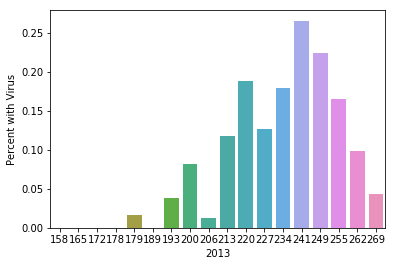

In [30]:
# Is the virus the same throughout the year (Just 2013)?
ax=sns.barplot(x='DayRunner', y='Virus', data=readings[readings['Year']==2013], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2013')
plt.show()

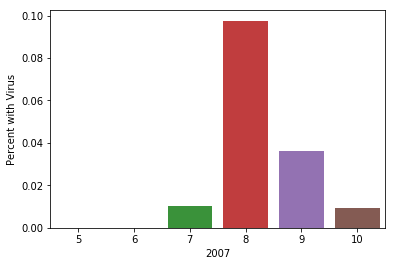

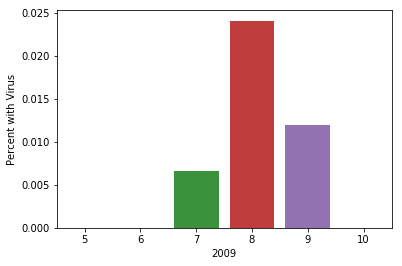

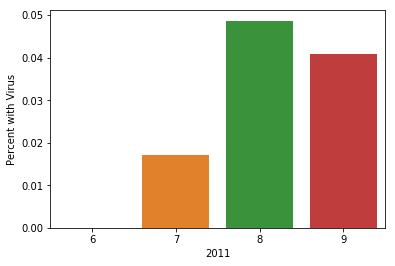

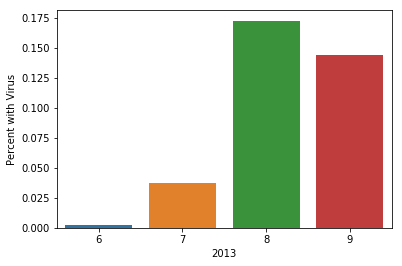

In [31]:
# Is the virus the same throughout the year? Nope. It peaks in August.
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2007], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2007')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2009], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2009')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2011], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2011')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2013], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2013')
plt.show()

[Text(0,0.5,'Percent of Traps with Virus'),
 Text(0.5,0,'Day of the Year (June 1=0)')]

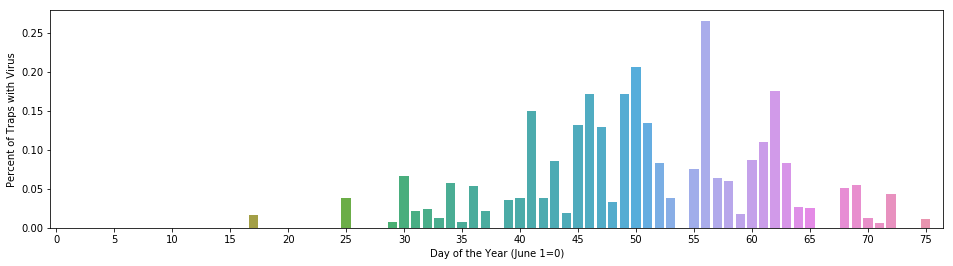

In [32]:
# Plot percent of WNV by day of the year.
ax = plt.figure(figsize=(16,4))
ax=sns.barplot(x='DayRunner', y='Virus', data=readings, ci=None)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(ylabel='Percent of Traps with Virus', xlabel='Day of the Year (June 1=0)')


## Species

In [33]:
## Species of Mosquito
readings['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [34]:
# Create a binary for everything that not pipiens or restuans
readings['CULEX']='ALTER'
readings.loc[(readings['Species']=='CULEX PIPIENS/RESTUANS') , 'CULEX']='PIPIENS-RESTUANS'
readings.loc[(readings['Species']=='CULEX RESTUANS') , 'CULEX']='RESTUANS'
readings.loc[(readings['Species']=='CULEX PIPIENS') , 'CULEX']='PIPIENS'
readings['CULEX'].value_counts()

PIPIENS-RESTUANS    4752
RESTUANS            2740
PIPIENS             2699
ALTER                315
Name: CULEX, dtype: int64

In [35]:
# Dummify the Species
dummies=pd.get_dummies(readings['CULEX'])
readings=pd.concat([readings, dummies], axis=1)

## Block

In [36]:
# Make a list of all blocks that have ever tested positive for the virus
risky_blocks=readings.groupby('Block').max()
risky_blox=list(risky_blocks.loc[risky_blocks['Virus']==1].index)
print(readings['Block'].nunique())
print(len(risky_blox)) 
print('percentage of blocks that are risky:', 100*((len(risky_blox))/readings['Block'].nunique()) )

64
52
percentage of blocks that are risky: 81.25


In [37]:
# Make a 0/1 variable marking these blocks
readings['bad_block']=0
readings.loc[readings['Block'].isin(risky_blox), 'bad_block']=1

## Lat and Long

In [38]:
print(readings['Latitude'].describe())
print(readings['Longitude'].describe())

count    10506.000000
mean        41.841139
std          0.112742
min         41.644612
25%         41.732984
50%         41.846283
75%         41.954690
max         42.017430
Name: Latitude, dtype: float64
count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: Longitude, dtype: float64


In [39]:
# Convert lat-long into a single variable
readings['lat_long'] = list(zip(readings['Latitude'], readings['Longitude']))
readings.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,MonthDay,DayRunner,Virus,CULEX,ALTER,PIPIENS,PIPIENS-RESTUANS,RESTUANS,bad_block,lat_long
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,0529,149,0,PIPIENS-RESTUANS,0,0,1,0,1,"(41.95469, -87.800991)"


In [40]:
# Make a list of all lat-long combos that have ever tested positive for the virus
latlongs=readings.groupby('lat_long').mean()
print(len(latlongs)) # There are 138 unique lat/longs.
print(train['Trap'].nunique()) # But there are only 136 unique traps. Huh? Hell, who cares.

138
136


In [41]:
# Certain lat-longs have the virus more frequently. That's useful!
hotspots = latlongs['Virus'].rename_axis('lat-long').reset_index(name='counts')
top20=hotspots.sort_values(by='counts', ascending=False).head(20)
print(top20)
top_hots=list(top20['lat-long']) # Save this list for later use.

                    lat-long    counts
131  (41.999129, -87.795585)  0.193548
125  (41.990284, -87.797127)  0.166667
99   (41.942114, -87.776385)  0.142857
134  (42.009876, -87.807277)  0.140000
116  (41.970248, -87.787992)  0.133333
23   (41.731922, -87.677512)  0.120000
114  (41.964242, -87.757639)  0.114754
118  (41.974089, -87.824812)  0.114286
45   (41.776428, -87.627096)  0.112903
96    (41.925652, -87.63359)  0.111111
83   (41.904194, -87.756155)  0.107692
29   (41.743402, -87.731435)  0.106796
136  (42.011601, -87.811506)  0.106061
117  (41.973845, -87.805059)  0.103448
51   (41.797616, -87.797894)  0.100000
107   (41.95469, -87.800991)  0.097297
104  (41.951866, -87.725057)  0.096774
121  (41.981964, -87.812827)  0.096774
94   (41.923738, -87.785288)  0.096154
89   (41.918705, -87.752329)  0.095238


count    138.000000
mean       0.043366
std        0.041730
min        0.000000
25%        0.000000
50%        0.036423
75%        0.071814
max        0.193548
Name: counts, dtype: float64
5


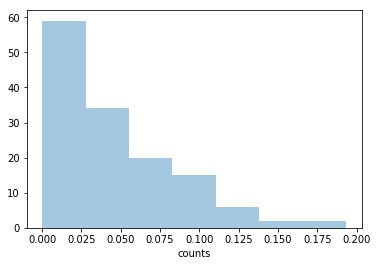

In [42]:
# What's the distribution of that? Only 5 are higher than .13
print(hotspots['counts'].describe())
print(len(hotspots[hotspots['counts']>.13]))
sns.distplot(hotspots['counts'], kde=False);

In [43]:
# Are there some lat-longs with higher mosquito counts? Yes.
countspots = latlongs['NumMosquitos'].rename_axis('lat-long').reset_index(name='counts')
top20=countspots.sort_values(by='counts', ascending=False).head(20)
print(top20)
top_chomps=list(top20['lat-long']) # Save this list for later use.

                    lat-long     counts
3    (41.673408, -87.599862)  39.977860
10   (41.702724, -87.536497)  36.000000
20   (41.726465, -87.585413)  31.643312
12   (41.704572, -87.565666)  20.718750
119  (41.974689, -87.890615)  20.514667
107   (41.95469, -87.800991)  20.054054
29   (41.743402, -87.731435)  19.553398
133  (42.008314, -87.777921)  19.194245
7    (41.686398, -87.531635)  18.933333
127  (41.992478, -87.862995)  18.462500
6    (41.682587, -87.707973)  17.517007
5    (41.680946, -87.535198)  17.072368
2    (41.662014, -87.724608)  17.060109
108  (41.957799, -87.930995)  16.621429
96    (41.925652, -87.63359)  16.111111
8    (41.688324, -87.676709)  15.255814
1    (41.659112, -87.538693)  15.169643
134  (42.009876, -87.807277)  15.160000
21   (41.728495, -87.600963)  15.115385
121  (41.981964, -87.812827)  14.935484


## Distance from Virus Hot Spots

In [44]:
# Here's how to calculate distance in Python.
from geopy.distance import vincenty
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(vincenty(newport_ri, cleveland_oh).miles)

538.3904451566326


In [66]:
# For each trap, let's calculate its distance from the 20 hottest virus hotspots
for x in range(19):
    digit=str(x)
    readings[('to_hotspot'+digit)]=readings['lat_long'].apply(lambda row: vincenty(row, top_hots[x]).miles)
    
    # Create an indicator if a row is less than a mile from one of the virus hotspots
    readings['flag_hotspot'+digit]=readings['to_hotspot'+digit].apply(lambda row: row<1).astype(int)
    
# Summarize those 10 indicators.
col_list=['flag_hotspot0',
          'flag_hotspot1',
          'flag_hotspot2',
          'flag_hotspot3',
          'flag_hotspot4',
          'flag_hotspot6',
          'flag_hotspot6',
          'flag_hotspot7',
          'flag_hotspot8',
          'flag_hotspot9',
         ]
readings['near_hotspot'] = readings[col_list].sum(axis=1)
readings['near_hotspot'].describe()

count    10506.000000
mean         0.119075
std          0.415093
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: near_hotspot, dtype: float64

In [67]:
# Do the same thing for its distance from the 20 spots with highest average mosquito count.
for x in range(19):
    digit=str(x)
    readings[('to_chompspot'+digit)]=readings['lat_long'].apply(lambda row: vincenty(row, top_chomps[x]).miles)   

    # Create an indicator if a row is less than a mile from one of the high-mosquito-count chompspots
    readings['flag_chompspot'+digit]=readings['to_chompspot'+digit].apply(lambda row: row<1).astype(int)
    
# Summarize those 10 indicators.
col_list=['flag_chompspot0',
          'flag_chompspot1',
          'flag_chompspot2',
          'flag_chompspot3',
          'flag_chompspot4',
          'flag_chompspot6',
          'flag_chompspot6',
          'flag_chompspot7',
          'flag_chompspot8',
          'flag_chompspot9',
         ]
readings['near_chompspot'] = readings[col_list].sum(axis=1)
readings['near_chompspot'].describe()

count    10506.000000
mean         0.244717
std          0.452170
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: near_chompspot, dtype: float64

## Export to csv

In [52]:
readings.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Day', 'Month', 'Year', 'MonthDay',
       'DayRunner', 'Virus', 'CULEX', 'ALTER', 'PIPIENS', 'PIPIENS-RESTUANS',
       'RESTUANS', 'bad_block', 'lat_long', 'to_hotspot0', 'to_hotspot1',
       'to_hotspot2', 'to_hotspot3', 'to_hotspot4', 'to_hotspot5',
       'to_hotspot6', 'to_hotspot7', 'to_hotspot8', 'to_hotspot9',
       'to_chompspot0', 'to_chompspot1', 'to_chompspot2', 'to_chompspot3',
       'to_chompspot4', 'to_chompspot5', 'to_chompspot6', 'to_chompspot7',
       'to_chompspot8', 'to_chompspot9', 'flag_hotspot0', 'flag_hotspot1',
       'flag_hotspot2', 'flag_hotspot3', 'flag_hotspot4', 'flag_hotspot5',
       'flag_hotspot6', 'flag_hotspot7', 'flag_hotspot8', 'flag_hotspot9',
       'flag_chompspot0', 'flag_chompspot1', 'flag_chompspot2',
       'flag_chompspot3', 'flag_chompspot4', 'flag_chompspot5

In [53]:
readings=readings.drop(['Trap', 'CULEX',  'WnvPresent', 'Day', 'MonthDay', 'Species',  'bad_block', 'spray'], axis=1)

In [54]:
# Save the cleaned, engineered data
dirname = '../Austin/'
readings.to_csv(dirname + 'readings.csv', index=False)

In [55]:
readings.columns

Index(['Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'Month',
       'Year', 'DayRunner', 'Virus', 'ALTER', 'PIPIENS', 'PIPIENS-RESTUANS',
       'RESTUANS', 'lat_long', 'to_hotspot0', 'to_hotspot1', 'to_hotspot2',
       'to_hotspot3', 'to_hotspot4', 'to_hotspot5', 'to_hotspot6',
       'to_hotspot7', 'to_hotspot8', 'to_hotspot9', 'to_chompspot0',
       'to_chompspot1', 'to_chompspot2', 'to_chompspot3', 'to_chompspot4',
       'to_chompspot5', 'to_chompspot6', 'to_chompspot7', 'to_chompspot8',
       'to_chompspot9', 'flag_hotspot0', 'flag_hotspot1', 'flag_hotspot2',
       'flag_hotspot3', 'flag_hotspot4', 'flag_hotspot5', 'flag_hotspot6',
       'flag_hotspot7', 'flag_hotspot8', 'flag_hotspot9', 'flag_chompspot0',
       'flag_chompspot1', 'flag_chompspot2', 'flag_chompspot3',
       'flag_chompspot4', 'flag_chompspot5', 'flag_chompspot6',
       'flag_chompspot7', 'flag_chompspot8', 'flag_chompspo

In [56]:
readings.head(2)

,Date,Address,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,Month,...,flag_chompspot2,flag_chompspot3,flag_chompspot4,flag_chompspot5,flag_chompspot6,flag_chompspot7,flag_chompspot8,flag_chompspot9,near_hotspot,near_chompspot
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,5,...,0,0,0,1,0,0,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,5,...,0,0,0,1,0,0,0,0,0,0
